# Dataset Description

## Overview

### The data has been split into two groups:

#### 1. training set (train.csv)

#### 2. test set (test.csv)

## Project Objectives

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
# Import necessary librarires to work with

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
url1 = "https://raw.githubusercontent.com/SAIKOTIREDDYSEELAM/Titanic-Survival-Prediction-Analysis/main/train.csv"
url2 = "https://raw.githubusercontent.com/SAIKOTIREDDYSEELAM/Titanic-Survival-Prediction-Analysis/main/test.csv"
train = pd.read_csv(url1)
test = pd.read_csv(url2)

In [4]:
# Performing Exploratory Data Analytics
train.info()
train.describe()
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


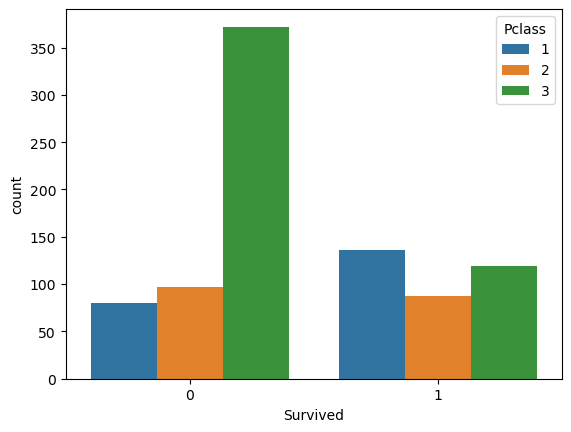

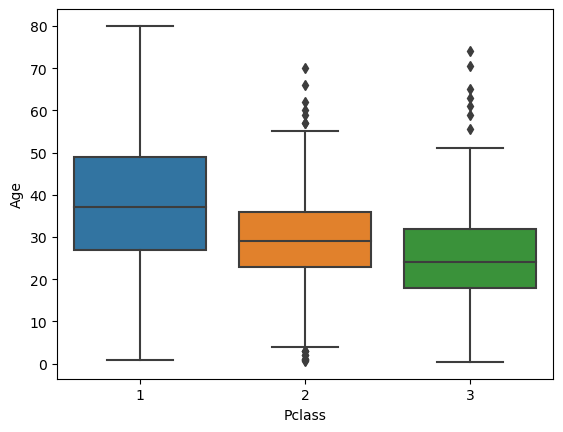

In [5]:
# Visulaizing the Data considering the "Survival and Age factors"
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()

In [6]:
# Preprocessing the data

In [7]:
# 1. Filling the missing values with a median 
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [8]:
# Now we are converting the "Sex" factor to a binary variable i.e., to 0 oe 1.
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [9]:
train = pd.get_dummies(train, columns=['Embarked', 'Pclass'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass'])

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [10]:
# Now we build the model and optimize it to predict the Survival on the Titanic
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone']
X_train = train[features]
y_train = train['Survived']

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

model = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [11]:
model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                               max_features=grid_search.best_params_['max_features'],
                               max_depth=grid_search.best_params_['max_depth'],
                               criterion=grid_search.best_params_['criterion'],
                               random_state=1)
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores.mean())


C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\seela\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

0.8215868432615656


In [12]:
test = test.dropna()
X_test = test[features]
predictions = model.predict(X_test)

In [13]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[417 rows x 2 columns]


In [16]:
print(test)
print(predictions)

     PassengerId                                          Name  Sex   Age  \
0            892                              Kelly, Mr. James    0  34.5   
1            893              Wilkes, Mrs. James (Ellen Needs)    1  47.0   
2            894                     Myles, Mr. Thomas Francis    0  62.0   
3            895                              Wirz, Mr. Albert    0  27.0   
4            896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0   
..           ...                                           ...  ...   ...   
413         1305                            Spector, Mr. Woolf    0  27.0   
414         1306                  Oliva y Ocana, Dona. Fermina    1  39.0   
415         1307                  Saether, Mr. Simon Sivertsen    0  38.5   
416         1308                           Ware, Mr. Frederick    0  27.0   
417         1309                      Peter, Master. Michael J    0  27.0   

     SibSp  Parch              Ticket      Fare  Embarked_C  Embarked_Q  \
